Product Aspirin added to inventory with expiry date 2025-12-31.
Product Tylenol added to inventory with expiry date 2024-06-30.
Product Amoxicillin added to inventory with expiry date 2023-11-30.
Sold 10 units of Aspirin. Sale amount: Rs5.00
Product Tylenol has expired and cannot be sold.
Sold 30 units of Aspirin. Sale amount: Rs15.00
Product Amoxicillin has expired and cannot be sold.

Sales Report:
Product: Aspirin, Quantity Sold: 10, Sale Amount: Rs5.00, Time: 2024-11-12 12:09:09
Product: Aspirin, Quantity Sold: 30, Sale Amount: Rs15.00, Time: 2024-11-12 12:09:09
Total Sales: Rs.20.00

Daily Sales Report:
Time: 2024-11-12 12:09:09, Sale Amount: Rs5.00
Time: 2024-11-12 12:09:09, Sale Amount: Rs15.00
Total Sales for Today: Rs.20.00


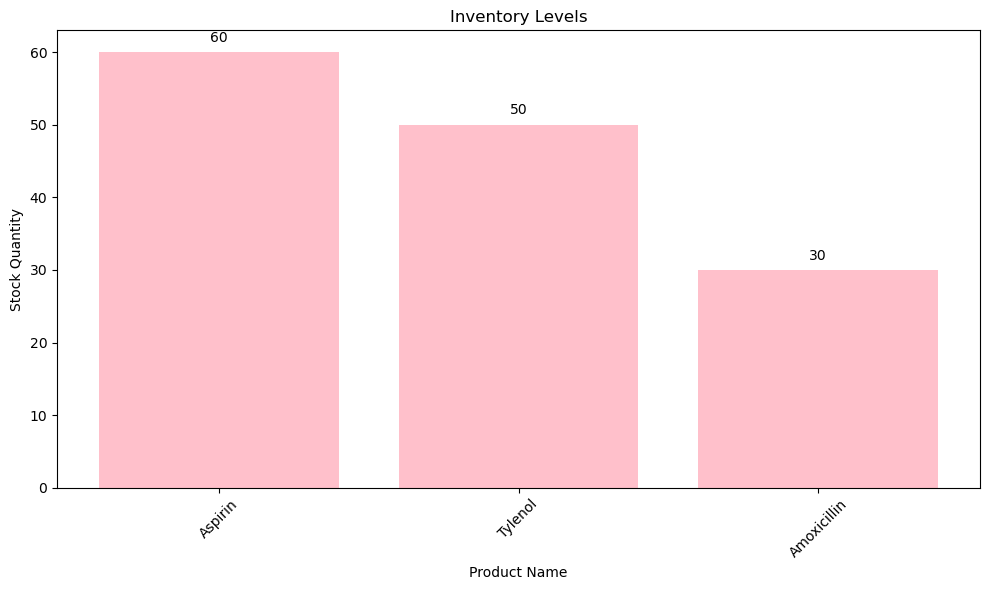

Program runtime: 0:00:00.111533 s


In [13]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the Product class
start_time = datetime.now()

#product class
class Product:
    def __init__(self, name, price, stock, min_stock, expiry_date):
        self.name = name
        self.price = price
        self.stock = stock
        self.min_stock = min_stock
        self.expiry_date = datetime.strptime(expiry_date, "%Y-%m-%d")  # Store expiry as datetime object

    def is_below_threshold(self):
        #Check if stock is below the min 
        return self.stock <= self.min_stock

    def is_expired(self):
        #Check if the product is expired
        return datetime.now() > self.expiry_date

    def update_stock(self, quantity):
        #Update the stock after selling or restocking
        self.stock += quantity

# Define the Inventory class
class Inventory:
    def __init__(self):
        self.products = []  # List of Product objects
        self.sales_history = []  # Sales records
        self.min_stock = []  # Reorder records
        self.daily_sales = []  # Daily sales tracking

    def add_product(self, product):
        #Add a product to the inventory
        self.products.append(product)
        print(f"Product {product.name} added to inventory with expiry date {product.expiry_date.date()}.")

    def remove_product(self, name):
        #Remove a product from the inventory
        for product in self.products:
            if product.name == name:
                self.products.remove(product)
                print(f"Product {name} removed from inventory.")
                return
        print(f"Product {name} not found in inventory.")

    def sell_product(self, name, quantity):
        #Sell a product and update stock and sales history
        for product in self.products:
            if product.name == name:
                if product.is_expired():
                    print(f"Product {name} has expired and cannot be sold.")
                    return
                if product.stock >= quantity:
                    product.update_stock(-quantity)
                    sale_amount = quantity * product.price
                    sale_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
                    self.sales_history.append((name, quantity, sale_amount, sale_time))
                    self.daily_sales.append((sale_time, sale_amount))
                    print(f"Sold {quantity} units of {name}. Sale amount: Rs{sale_amount:.2f}")
                    return
                else:
                    print(f"Insufficient stock for {name}. Available stock: {product.stock}")
                    return
        print(f"Product {name} not found in inventory.")


    def plot_inventory(self):
        #Plot inventory levels over time using Matplotlib."""
        product_names = [product.name for product in self.products]
        product_stocks = [product.stock for product in self.products]

        # Plot inventory levels
        plt.figure(figsize=(10, 6))
        bars = plt.bar(product_names, product_stocks, color='pink')
        plt.title('Inventory Levels')
        plt.xlabel('Product Name')
        plt.ylabel('Stock Quantity')
        plt.xticks(rotation=45)

        # Adding text on top of each bar
        for bar in bars:
            height = bar.get_height()
            # Add value text above the bars
            plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height}', ha='center', va='bottom', fontsize=10, color='black')

        plt.tight_layout()
        plt.show()

    def generate_sales_report(self):
        #Generate a sales report showing all sales."""
        print("\nSales Report:")
        if not self.sales_history:
            print("No sales have been made yet.")
        else:
            total_sales = 0
            for name, quantity, sale_amount, sale_time in self.sales_history:
                print(f"Product: {name}, Quantity Sold: {quantity}, Sale Amount: Rs{sale_amount:.2f}, Time: {sale_time}")
                total_sales += sale_amount
            print(f"Total Sales: Rs.{total_sales:.2f}")

    def generate_daily_sales_report(self):
        #Generate a daily sales report."""
        print("\nDaily Sales Report:")
        if not self.daily_sales:
            print("No sales data available for today.")
        else:
            daily_total = 0
            for sale_time, sale_amount in self.daily_sales:
                print(f"Time: {sale_time}, Sale Amount: Rs{sale_amount:.2f}")
                daily_total += sale_amount
            print(f"Total Sales for Today: Rs.{daily_total:.2f}")

# Example usage of Inventory Management System
if __name__ == "__main__":
    # Record start time to calculate runtime
    #start_time = datetime.now()

    # Create the inventory system
    inventory = Inventory()

    # Add products to the inventory with expiry dates
    inventory.add_product(Product("Aspirin", 0.50, 100, 20, "2025-12-31"))
    inventory.add_product(Product("Tylenol", 1.00, 50, 10, "2024-06-30"))
    inventory.add_product(Product("Amoxicillin", 2.00, 30, 10, "2023-11-30"))

    # Simulate selling products
    inventory.sell_product("Aspirin", 10)
    inventory.sell_product("Tylenol", 5)
    inventory.sell_product("Aspirin", 30)  # Selling more Aspirin
    inventory.sell_product("Amoxicillin", 2)

    # Check for reorders
   # inventory.check_reorders()

    # Generate sales reports
    inventory.generate_sales_report()
    inventory.generate_daily_sales_report()

    # Plot inventory levels
    inventory.plot_inventory()

    # Calculate runtime and display it
    end_time = datetime.now()
    runtime = end_time - start_time
    print(f"Program runtime: {runtime} s")

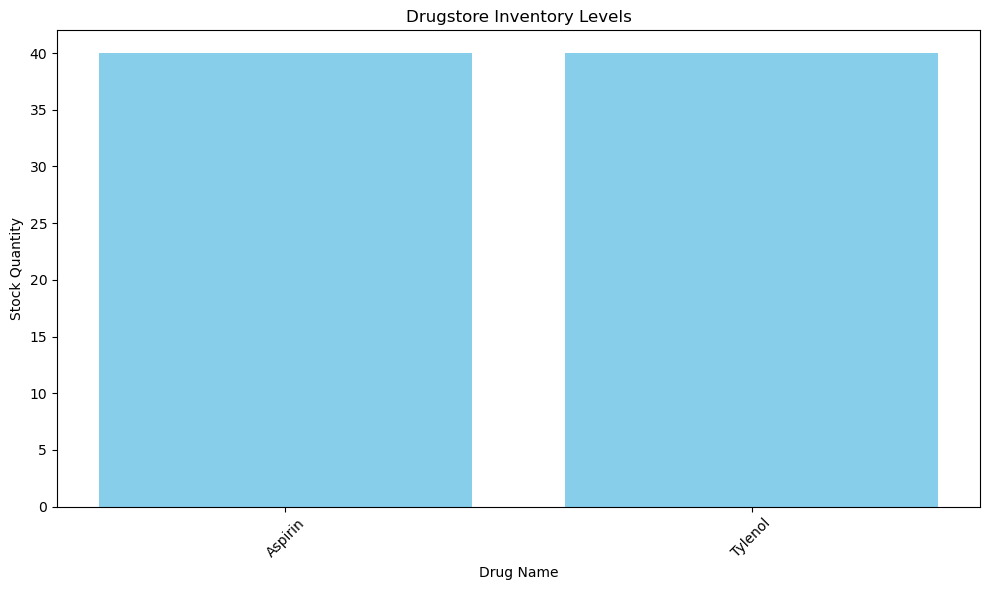

In [21]:
import tkinter as tk
from tkinter import messagebox
from datetime import datetime
import matplotlib.pyplot as plt
import time  # Import the time module for runtime tracking

class Drug:
    def __init__(self, name, price, stock, min_stock=5, expiration_date=None):
        self.name = name
        self.price = price
        self.stock = stock
        self.min_stock = min_stock
        self.expiration_date = expiration_date

    def get_effective_price(self):
        """No discount, return the original price."""
        return self.price

    def is_near_expiry(self):
        """Check if drug is near expiry (within 30 days)."""
        if self.expiration_date:
            days_to_expiry = (self.expiration_date - datetime.now()).days
            return days_to_expiry <= 30
        return False

class Drugstore:
    def __init__(self):
        self.inventory = {}
        self.total_sales = 0
        self.sales_history = []

    def add_drug(self, name, price, stock, min_stock, expiration_date):
        """Add or update a drug in inventory."""
        start_time = time.time()  # Start time for performance tracking
        expiration_date = datetime.strptime(expiration_date, "%Y-%m-%d") if expiration_date else None
        if name in self.inventory:
            self.inventory[name].stock += stock
        else:
            self.inventory[name] = Drug(name, price, stock, min_stock, expiration_date)
        end_time = time.time()  # End time
        runtime = end_time - start_time
        return runtime

    def remove_drug(self, name):
        """Remove drug from inventory."""
        if name in self.inventory:
            del self.inventory[name]
            return True
        return False

    def sell_drug(self, name, quantity):
        """Process the sale of a drug."""
        start_time = time.time()  # Start time for performance tracking
        if name in self.inventory:
            drug = self.inventory[name]
            if drug.stock >= quantity:
                drug.stock -= quantity
                sale_amount = quantity * drug.get_effective_price()
                self.total_sales += sale_amount
                self.sales_history.append((name, quantity, sale_amount))
                end_time = time.time()  # End time
                runtime = end_time - start_time
                return sale_amount, drug.stock, runtime
            else:
                end_time = time.time()  # End time
                runtime = end_time - start_time
                return None, drug.stock, runtime
        end_time = time.time()  # End time
        runtime = end_time - start_time
        return None, None, runtime

    def generate_sales_report(self):
        """Generate a summary report of all sales."""
        start_time = time.time()  # Start time for performance tracking
        report = f"Total Revenue: Rs{self.total_sales:.2f}\n\nSales History:\n"
        for name, quantity, sale_amount in self.sales_history:
            report += f"Drug: {name}, Quantity Sold: {quantity}, Sale Amount: Rs{sale_amount:.2f}\n"
        end_time = time.time()  # End time
        runtime = end_time - start_time
        return report, runtime

    def view_inventory(self):
        """Get current stock details for all drugs."""
        inventory_list = []
        for name, drug in self.inventory.items():
            expiry = drug.expiration_date.strftime('%Y-%m-%d') if drug.expiration_date else "N/A"
            low_stock = " (Low Stock)" if drug.stock < drug.min_stock else ""
            expiry_alert = " (Near Expiry)" if drug.is_near_expiry() else ""
            inventory_list.append(f"{name}: Price Rs{drug.price}, Stock {drug.stock}{low_stock}, "
                                  f"Min Stock {drug.min_stock}, Expiry {expiry}{expiry_alert}")
        return "\n".join(inventory_list)

# GUI Implementation
class DrugstoreApp:
    def __init__(self, root):
        self.root = root
        self.store = Drugstore()
        self.root.title("Drugstore Management System")

        # Add Drug Section
        tk.Label(root, text="Add Drug", font=("Arial", 14)).grid(row=0, column=0, columnspan=4, pady=10)
        self.create_add_drug_section()

        # Sell Drug Section
        tk.Label(root, text="Sell Drug", font=("Arial", 14)).grid(row=0, column=2, columnspan=2)
        self.create_sell_drug_section()

        # View Inventory Button
        tk.Button(root, text="View Inventory", command=self.view_inventory).grid(row=6, column=0, columnspan=2, pady=10)

        # Generate Sales Report Button
        tk.Button(root, text="Generate Sales Report", command=self.generate_sales_report).grid(row=6, column=2, columnspan=2, pady=10)

        # Plot Inventory Button (Using matplotlib)
        tk.Button(root, text="Plot Inventory", command=self.plot_inventory).grid(row=7, column=0, columnspan=4, pady=10)

    def create_add_drug_section(self):
        # Create the entries for drug information
        self.name_entry = tk.Entry(self.root)
        self.price_entry = tk.Entry(self.root)
        self.stock_entry = tk.Entry(self.root)
        self.min_stock_entry = tk.Entry(self.root)
        self.expiration_entry = tk.Entry(self.root)

        # Add labels for the entries
        tk.Label(self.root, text="Name:").grid(row=1, column=0, padx=5, pady=5, sticky="e")
        tk.Label(self.root, text="Price:").grid(row=2, column=0, padx=5, pady=5, sticky="e")
        tk.Label(self.root, text="Stock:").grid(row=3, column=0, padx=5, pady=5, sticky="e")
        tk.Label(self.root, text="Min Stock:").grid(row=4, column=0, padx=5, pady=5, sticky="e")
        tk.Label(self.root, text="Expiration (YYYY-MM-DD):").grid(row=5, column=0, padx=5, pady=5, sticky="e")

        # Place entries in the grid
        self.name_entry.grid(row=1, column=1, padx=5, pady=5)
        self.price_entry.grid(row=2, column=1, padx=5, pady=5)
        self.stock_entry.grid(row=3, column=1, padx=5, pady=5)
        self.min_stock_entry.grid(row=4, column=1, padx=5, pady=5)
        self.expiration_entry.grid(row=5, column=1, padx=5, pady=5)

        # Button to add drug
        tk.Button(self.root, text="Add Drug", command=self.add_drug).grid(row=6, column=1, pady=10)

    def create_sell_drug_section(self):
        self.sell_name_entry = tk.Entry(self.root)
        self.sell_quantity_entry = tk.Entry(self.root)

        tk.Label(self.root, text="Name:").grid(row=1, column=2)
        tk.Label(self.root, text="Quantity:").grid(row=2, column=2)

        self.sell_name_entry.grid(row=1, column=3, padx=5, pady=5)
        self.sell_quantity_entry.grid(row=2, column=3, padx=5, pady=5)

        tk.Button(self.root, text="Sell Drug", command=self.sell_drug).grid(row=3, column=3, pady=10)

    def add_drug(self):
        name = self.name_entry.get()
        price = float(self.price_entry.get())
        stock = int(self.stock_entry.get())
        min_stock = int(self.min_stock_entry.get())
        expiration_date = self.expiration_entry.get()

        runtime = self.store.add_drug(name, price, stock, min_stock, expiration_date)
        messagebox.showinfo("Success", f"{name} added to inventory. Time taken: {runtime:.4f} seconds.")
        self.clear_add_drug_fields()

    def sell_drug(self):
        name = self.sell_name_entry.get()
        quantity = int(self.sell_quantity_entry.get())
        sale_amount, remaining_stock, runtime = self.store.sell_drug(name, quantity)

        if sale_amount is not None:
            messagebox.showinfo("Sale Successful", f"Sold {quantity} of {name}. Sale amount: Rs{sale_amount:.2f}. Time taken: {runtime:.4f} seconds")
        else:
            messagebox.showwarning("Error", f"Insufficient stock for {name} or drug not found.")
        self.clear_sell_drug_fields()

    def view_inventory(self):
        inventory_list = self.store.view_inventory()
        messagebox.showinfo("Inventory", inventory_list)

    def generate_sales_report(self):
        report, runtime = self.store.generate_sales_report()
        messagebox.showinfo("Sales Report", f"{report}\nTime taken to generate report: {runtime:.4f} seconds")

    def plot_inventory(self):
        """Plot inventory stock using matplotlib."""
        drug_names = list(self.store.inventory.keys())
        stock_levels = [drug.stock for drug in self.store.inventory.values()]

        plt.figure(figsize=(10, 6))
        plt.bar(drug_names, stock_levels, color='skyblue')
        plt.xlabel('Drug Name')
        plt.ylabel('Stock Quantity')
        plt.title('Drugstore Inventory Levels')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def clear_add_drug_fields(self):
        self.name_entry.delete(0, tk.END)
        self.price_entry.delete(0, tk.END)
        self.stock_entry.delete(0, tk.END)
        self.min_stock_entry.delete(0, tk.END)
        self.expiration_entry.delete(0, tk.END)

    def clear_sell_drug_fields(self):
        self.sell_name_entry.delete(0, tk.END)
        self.sell_quantity_entry.delete(0, tk.END)

# Run the application
root = tk.Tk()
app = DrugstoreApp(root)
root.mainloop()